<a href="https://colab.research.google.com/github/deepthi50997/machine-learning-/blob/main/Student_Scores_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
markmedhat_student_scores_path = kagglehub.dataset_download('markmedhat/student-scores')

100%|██████████| 61.9k/61.9k [00:00<00:00, 53.6MB/s]

Extracting files...


In [ ]:
zzzdf['gender'] = df['gender'].replace({'male':0,'female':1})
df['part_time_job'] = df['part_time_job'].astype(int)
df['extracurricular_activities'] = df['extracurricular_activities'].astype(int)

In [ ]:
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,0,0,3,0,27,Lawyer,82.000000
1,1,0,2,0,47,Doctor,91.428571
2,1,0,9,1,13,Government Officer,86.428571
3,1,0,5,0,3,Artist,78.714286
4,0,0,5,0,10,Unknown,74.428571
...,...,...,...,...,...,...,...
1995,0,0,2,0,30,Construction Engineer,79.714286
1996,0,0,2,0,20,Software Engineer,76.285714
1997,1,0,5,0,14,Software Engineer,82.571429
1998,1,1,10,1,5,Business Owner,80.857143


<Axes: xlabel='career_aspiration'>

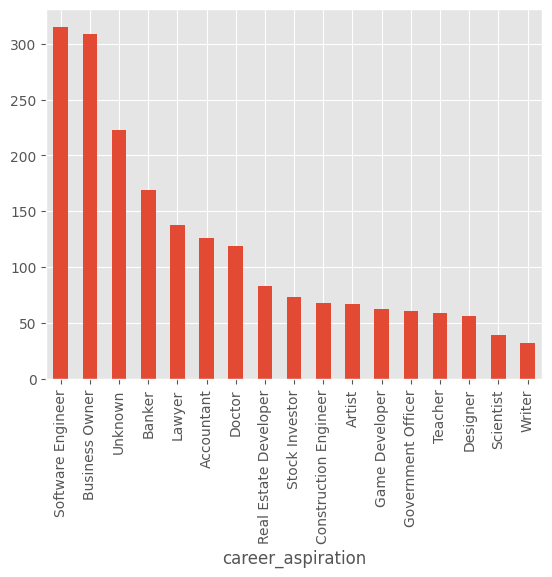

In [ ]:
df['career_aspiration'].value_counts().plot(kind='bar')

In [ ]:
labelencoder = LabelEncoder()
df['career_aspiration'] = labelencoder.fit_transform(df['career_aspiration'])

In [ ]:
df

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,TOTAL_MARK
0,0,0,3,0,27,9,82.000000
1,1,0,2,0,47,6,91.428571
2,1,0,9,1,13,8,86.428571
3,1,0,5,0,3,1,78.714286
4,0,0,5,0,10,15,74.428571
...,...,...,...,...,...,...,...
1995,0,0,2,0,30,4,79.714286
1996,0,0,2,0,20,12,76.285714
1997,1,0,5,0,14,12,82.571429
1998,1,1,10,1,5,3,80.857143


In [ ]:
X = df.drop(columns = 'TOTAL_MARK')
y = df['TOTAL_MARK']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Use the best parameters to train the final model
best_params = {'n_estimators': 439,
    'max_depth': 3,
    'learning_rate': 0.017629084511653136,
    'subsample': 0.9713755557379617,
    'colsample_bytree': 0.7354143949346962,
    'reg_alpha': 8.318950808630586,
    'reg_lambda': 7.638009786115094}

xgb_best = XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = xgb_best.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)

Test RMSE: 4.216362013829732


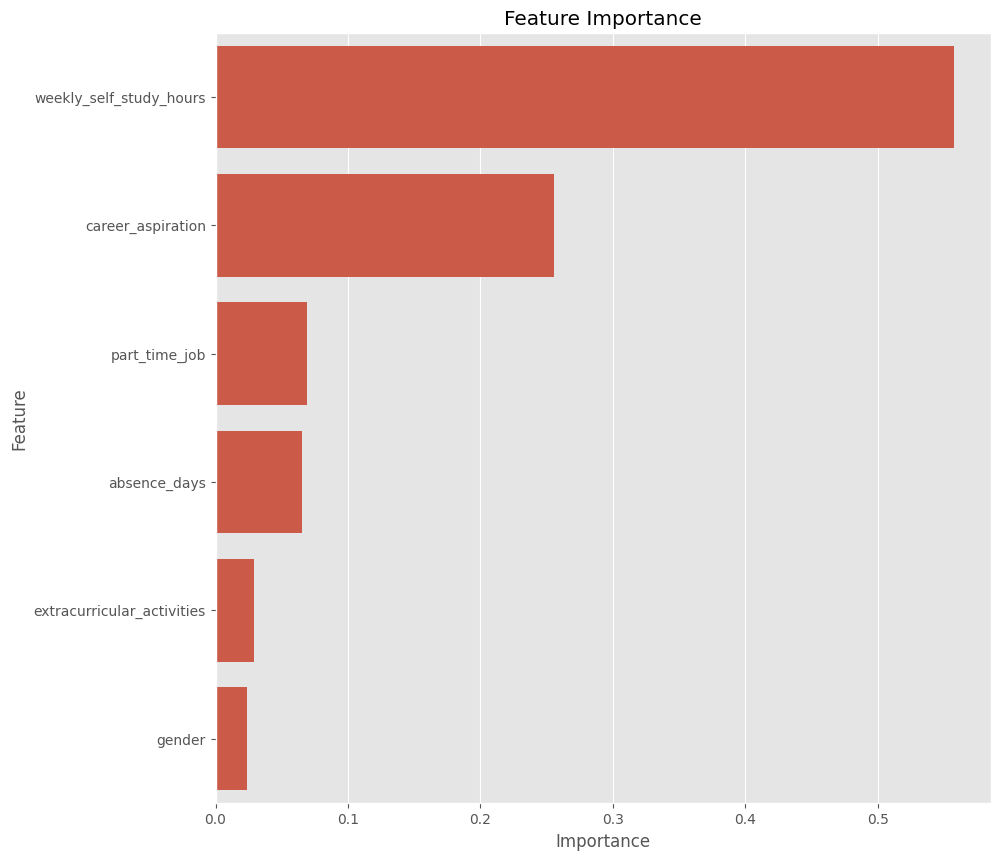

In [ ]:
# Optianing the most features that had an impact of our price
def plot_feature_importance(model, feature_names=None, top_n=10, plot=True):

    feature_importance = model.feature_importances_

    if feature_names is None:
        feature_names = model.feature_name()

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    if plot:
        plt.figure(figsize=(10, 10))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importance')
        plt.show()

    return feature_importance_df

feature_importance_df = plot_feature_importance(xgb_best,feature_names=X.columns)